## Case 1: Asset $j$ (aka r2 aka R-1) bought in quantity $-\Delta R_j$ with asset $i$ (aka r1 aka R-0)

In [1]:
import pandas as pd

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *

########## AGENT CONFIGURATION ##########
# key -> token name, value -> token amount owned by agent
# note that token name of 'omniABC' is used for omnipool LP shares of token 'ABC'
# omniHDXABC is HDX shares dedicated to pool of token ABC

trader = {'HDX': 1000000, 'R0': 700, 'R1': 9000,  'R2': 1300000,  'R3': 8300000}
trade_scale = 0.1
# key -> agent_id, value -> agent dict
agent_d = {'Trader': trader}

########## ACTION CONFIGURATION ##########
# Use 1% of pool, so 10% of own holdings
action_dict = {
    'sell_r2_for_r1': {'token_buy': 'R1', 'token_sell': 'R2', 'amount_sell': 5000, 'action_id': 'Trade',
                       'agent_id': 'Trader'},
    'sell_r1_for_r2': {'token_sell': 'R1', 'token_buy': 'R2', 'amount_buy': trade_scale*trader['R2'] , 'action_id': 'Trade',
                       'agent_id': 'Trader'}
}

# list of (action, number of repetitions of action), timesteps = sum of repititions of all actions
trade_count = 1
action_ls = [('trade', trade_count)]

# maps action_id to action dict, with some probability to enable randomness
prob_dict = {
    'trade': {'sell_r2_for_r1': 0.0,
              'sell_r1_for_r2': 1.0}  # really buy_r2_with_r1
}

########## CFMM INITIALIZATION ##########

initial_values = {
    'token_list': ['R0', 'R1', 'R2', 'R3', 'R4'],
    'R': [7000, 90000,13000000,8300000],
    'P': [16714.28, 1211.11,6.15,1.87],
    'fee_assets': 0.0015,
    'fee_HDX': 0.0015
}

############################################ SETUP ##########################################################

config_params = {
    'cfmm_type': "",
    'initial_values': initial_values,
    'agent_d': agent_d,
    'action_ls': action_ls,
    'prob_dict': prob_dict,
    'action_dict': action_dict,
}

config_dict, state = init_utils.get_configuration(config_params)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()

rdf, agent_df = processing.postprocessing(events)

print(agent_df.tail(20))




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Is this trade type sell called?
Is this trade type sell called?
Total execution time: 0.07s
   simulation  subset  run  substep  timestep agent_label          q  s-0  \
3           0       0    1        3         1      Trader 1000000.00    0   

   s-1  s-2  s-3  r-0     r-1        r-2      r-3  p-0  p-1  p-2  p-3  
3    0    0    0  700 8326.17 1430000.00  8300000    0    0    0    0  


In [2]:
agent_df.head()

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,s-2,s-3,r-0,r-1,r-2,r-3,p-0,p-1,p-2,p-3
3,0,0,1,3,1,Trader,1000000.00,0,0,0,0,700,8326.17,1430000.00,8300000,0,0,0,0


In [3]:
rdf.head()

,R-0,R-1,R-2,R-3,Q-0,Q-1,Q-2,Q-3,S-0,S-1,...,token_list-3,token_list-4,fee_assets,fee_HDX,n,simulation,subset,run,substep,timestep
0,7000,90000.00,13000000.00,8300000,116999960.00,108999900.00,79950000.00,15521000.00,7000,90000,...,R3,R4,0.00,0.00,4,0,0,1,0,0
3,7000,90673.83,12870000.00,8300000,116999960.00,108189883.76,80760026.69,15521000.00,7000,90000,...,R3,R4,0.00,0.00,4,0,0,1,3,1


In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame(events)

,external,AMM,uni_agents,simulation,subset,run,substep,timestep
0,{},"{'R': [7000, 90000, 13000000, 8300000], 'Q': [...","{'Trader': {'q': 1000000, 's': [0, 0, 0, 0], '...",0,0,1,0,0
1,{},"{'R': [7000, 90000, 13000000, 8300000], 'Q': [...","{'Trader': {'q': 1000000, 's': [0, 0, 0, 0], '...",0,0,1,1,1
2,{},"{'R': [7000, 90673.82881757418, 12870000.0, 83...","{'Trader': {'q': 1000000.0, 's': [0, 0, 0, 0],...",0,0,1,2,1
3,{},"{'R': [7000, 90673.82881757418, 12870000.0, 83...","{'Trader': {'q': 1000000.0, 's': [0, 0, 0, 0],...",0,0,1,3,1


In [5]:
rdf.columns

Index(['R-0', 'R-1', 'R-2', 'R-3', 'Q-0', 'Q-1', 'Q-2', 'Q-3', 'S-0', 'S-1',
       'S-2', 'S-3', 'A-0', 'A-1', 'A-2', 'A-3', 'B-0', 'B-1', 'B-2', 'B-3',
       'D', 'T', 'H', 'token_list-0', 'token_list-1', 'token_list-2',
       'token_list-3', 'token_list-4', 'fee_assets', 'fee_HDX', 'n',
       'simulation', 'subset', 'run', 'substep', 'timestep'],
      dtype='object')

In [49]:
def plot_state(df, var_list: list, sim_labels: list = ['0', '1', '2', '3'], plot_title: str='') -> None:
    simulations = df.simulation.unique()
    # print(simulations)
    plot_figs = 101 + 10*len(sim_labels)
    plt.tight_layout(pad=2)
    for var in var_list:
        plt.figure(figsize=(15, 5))
        plt.suptitle(plot_title)
        if var in df.columns:
            init = plot_figs # make this scale to number of assets
            ax = plt.subplot(init, title=var)
            for i in simulations:
                df[[var, 'timestep']][df['simulation'] == i].astype(float).plot(ax=ax, y=[var], x='timestep',\
                    xlabel= 'Timestep',label=[sim_labels[i]])
            plt.savefig('images/'+ plot_title + var + '.png', bbox_inches='tight', pad_inches=5)
        elif var + '-0' in df.columns:
            max_i = 0
            while var + '-' + str(max_i + 1) in df.columns:
                max_i += 1
            for i in range(max_i + 1):
                init = plot_figs + i # make this scale to number of assets
                var_i = var + '-' + str(i)
                ax = plt.subplot(init, title=var_i)
                for j in simulations:
                    df[[var_i, 'timestep']][df['simulation'] == j].astype(float).plot(ax=ax, y=[var_i], x='timestep',
                    xlabel= 'Timestep',label=[sim_labels[j]])
                plt.savefig('images/'+ plot_title+var + '.png')
    plt.show()

<Figure size 432x288 with 0 Axes>

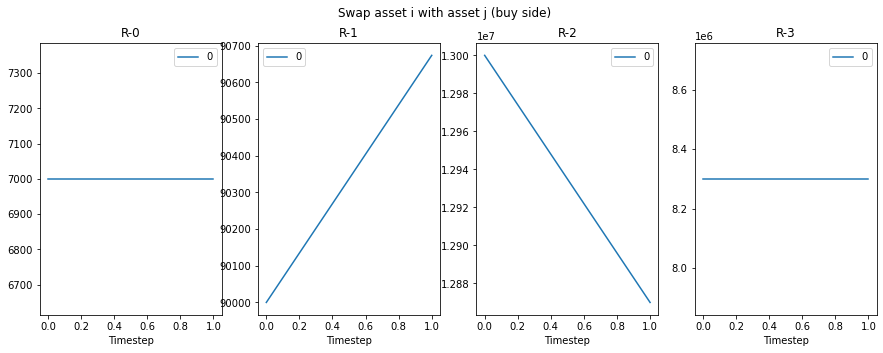

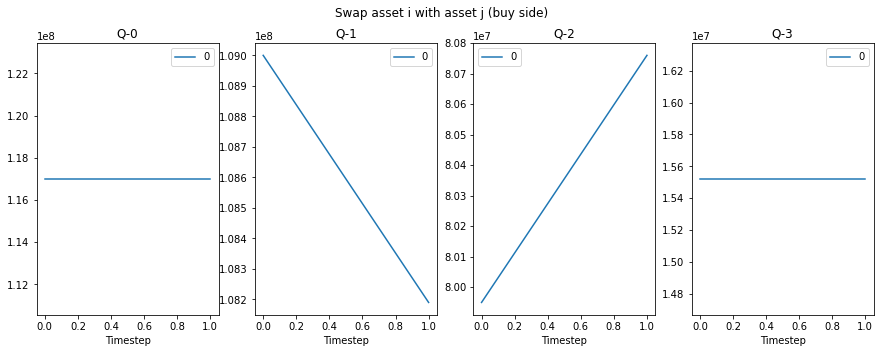

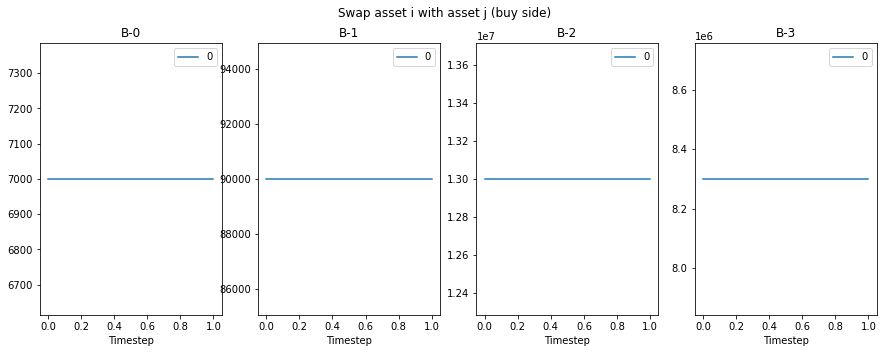

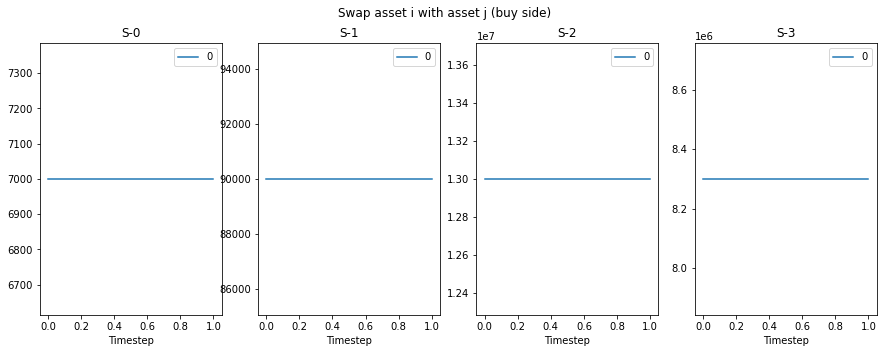

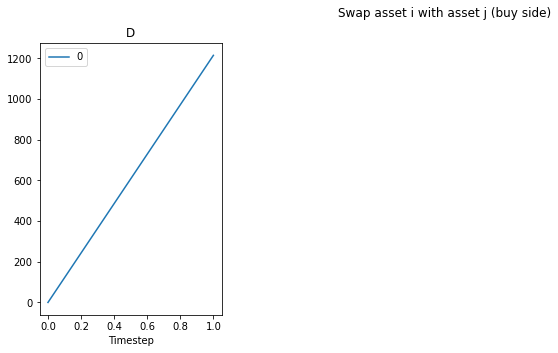

In [50]:
var_list = ['R', 'Q', 'B','S','D']
plot_state(rdf, var_list, plot_title='Swap asset i with asset j (buy side)')

In [ ]:

var_list = ['R', 'Q', 'B','S','D']
plot_vars(rdf, var_list)

In [ ]:
agent_df

In [ ]:
var_list = ['r', 's']
plot_vars(agent_df, var_list)

#### Case 1: Asset $j$ bought in quantity $-\Delta R_j$ with asset $i$
$$
\begin{align}
\tilde{\Delta Q_j} &= Q_j\frac{- \Delta R_j}{R_j(1 - f_A) + \Delta R_j}\\
\tilde{\Delta Q_i} &= -\frac{\tilde{\Delta Q_j}}{1 - f_P}\\
\Delta R_i &= R_i\frac{- \tilde{\Delta Q_i}}{Q_i + \tilde{\Delta Q_i}}
\end{align}
$$

Now that the correct $\Delta R_i$ is computed, we can treat this trade as a "sell" trade of asset $i$ in quantity $\Delta R_i$.

In [ ]:
# KEY for getting verification to pass
# sign convention is amount to buy is negated
action_dict['sell_r1_for_r2']['amount_buy'] = -action_dict['sell_r1_for_r2']['amount_buy']


In [ ]:
delta_tilde_qj = rdf['Q-1'][0] * (-action_dict['sell_r1_for_r2']['amount_buy'])/(rdf['R-1'][0]*(1-initial_values['fee_assets'])+action_dict['sell_r1_for_r2']['amount_buy'])
delta_tilde_qj

In [ ]:
delta_tilde_qi = -delta_tilde_qj / (1-initial_values['fee_HDX'])
delta_tilde_qi

In [ ]:
delta_ri = rdf['R-0'][0] * (-delta_tilde_qi)/(rdf['Q-0'][0]+delta_tilde_qi)
delta_ri

In [ ]:
# delta_rj = -action_dict['sell_r1_for_r2']['amount_buy']
# delta_rj

#### Case 2: Asset $i$ sold in quantity $\Delta R_i$ for asset $j$

Asset $i$ is sold for asset $j$ in a series of trades, with 
$$
\begin{align}
\Delta Q_i &= Q_i\frac{- \Delta R_i}{R_i + \Delta R_i}\\
\Delta Q_j' &= -\Delta Q_i (1 - f_P)\\
\Delta R_j' &= R_j\frac{- \Delta Q_j'}{Q_j + \Delta Q_j'}\\
\Delta R_j &= \Delta R_j'(1 - f_A)
\end{align}
$$

In [ ]:
delta_qi = rdf['Q-0'][0] * (-delta_ri)/(rdf['R-0'][0]+delta_ri)
delta_qi

In [ ]:
delta_qj_prime = -delta_qi * (1-initial_values['fee_HDX'])
delta_qj_prime

In [ ]:
delta_rj_prime = rdf['R-1'][0] * (-delta_qj_prime)/(rdf['Q-1'][0]+delta_qj_prime)
delta_rj_prime

In [ ]:
delta_rj = delta_rj_prime*(1-initial_values['fee_assets'])
delta_rj

### Fee accounting
The LHDX fee is added to treasury
$$
\Delta D = -\Delta Q_i f_P
$$

It is helpful to consider $\Delta R_j'$, the amount initially swapped out given $\Delta R_i$ before the asset fee is added back to the $j$ pool.

Note that $\Delta R_j = (1 - f_A) \Delta R_j'$. The spot price immediately after the $j$ swap is $\frac{Q_j + \Delta Q_j'}{R_j + \Delta R_j'}$.
Thus we want
$$
\frac{Q_j^+}{R_j^+} = \frac{Q_j + \Delta Q_j'}{R_j + \Delta R_j'}
$$

Solving this for $Q_j^+$, we see that
$$
\begin{align}
R_j^+ &= R_j + \Delta R_j\\
Q_j^+ &= R_j^+ \frac{Q_jR_j}{\left(R_j + \frac{\Delta R_j}{1 - f_A}\right)^2}
\end{align}
$$

In [ ]:
delta_d = -delta_qi*initial_values['fee_HDX']
delta_d

In [ ]:
R_j_plus = rdf['R-2'][0] + (delta_rj)
R_j_plus

In [ ]:
Q_j_plus = R_j_plus * rdf['Q-2'][0] * rdf['R-2'][0] / (rdf['R-2'][0] + ((delta_rj)/(1-initial_values['fee_assets'])))**2
Q_j_plus

#### $Q_j$ Check

In [ ]:
rdf['Q-2'][3]# == Q_j_plus

In [ ]:
rdf['Q-2'][3] == Q_j_plus

#### $Q_i$ Check

In [ ]:
rdf['Q-1'][3] == rdf['Q-1'][0] + (delta_qi)

In [ ]:
rdf['Q-1'][3]

In [ ]:
rdf['Q-1'][0] + (delta_qi)  # SIGN CHANGE

#### $R_i$ Check

In [ ]:
rdf['R-1'][3] == rdf['R-1'][0] + (delta_ri)

In [ ]:
rdf['R-1'][0] + (delta_ri)

In [ ]:
rdf['R-1'][3]

#### $R_j$ Check

In [ ]:
round(rdf['R-2'][3],8) == rdf['R-2'][0] + (delta_rj)

In [ ]:
rdf['R-2'][0] + (delta_rj)

In [ ]:
rdf['R-2'][3]